In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

from IPython.display import display

import seaborn as sns
sns.set_theme()

from utils import *

In [2]:
results_orginal = pd.read_csv("../results_gathering/results_table.csv")
results_orginal.head()

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
0,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
1,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
2,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
3,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
4,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt


In [3]:
results_orginal.columns

Index(['pred_text', 'pred_text_len', 'pred_x', 'pred_y', 'pred_x1', 'pred_x2',
       'pred_y1', 'pred_y2', 'pred_width', 'pred_hight', 'text', 'text_len',
       'x', 'y', 'x1', 'x2', 'y1', 'y2', 'width', 'hight', 'detection_status',
       'recogniton_status', 'redable_label', 'iou', 'labels_file_name',
       'detections_file_name', 'recognition_file_name', 'image_name',
       'image_width', 'image_height', 'dataset', 'model', 'weights'],
      dtype='object')

In [4]:
# Remove non readable examples
print(f"Len of results table with all examples: {len(results_orginal)}")
results_orginal = results_orginal[results_orginal.redable_label == True]
print(f"Len of results table without non readable examples: {len(results_orginal)}")

Len of results table with all examples: 38334
Len of results table without non readable examples: 24389


In [5]:
path =  "./text_len_plots"
kategoria = "Długość tekstu"

In [6]:
split_column = 'text_len'

In [7]:
detections = results_orginal[results_orginal.text != '-'][['dataset', 'text_len']]
detections.text_len = detections.text_len.astype('int')
detections = detections[detections.text_len != 0]
# detections = detections.sort_values(by='text_len')
detections.head()

,dataset,text_len
8,ic15,11
9,ic15,5
10,ic15,4
11,ic15,3
12,ic15,4


Text(0, 0.5, 'Liczba instancji tekstu')

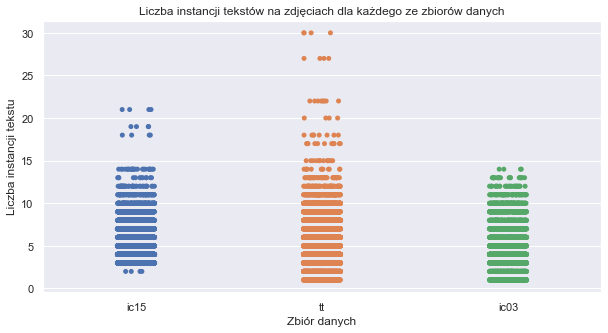

In [8]:
fig, ax = plt.subplots( figsize=(10, 5))
sns.stripplot(data=detections, x='dataset', y='text_len', ax=ax, dodge=True)
ax.set_title("Liczba instancji tekstów na zdjęciach dla każdego ze zbiorów danych")
ax.set_xlabel("Zbiór danych")
ax.set_ylabel("Liczba instancji tekstu")

In [9]:
split_conditions = {
    "1-4": (1, 5),
    "5-9": (5, 10),
    "10-15": (11, 16),
    "15+":(15, np.inf)
}
detection_indexes = {}
for key, value in split_conditions.items():
    indexes = list(detections[detections.text_len.between(*value, inclusive="left")].index)
    detection_indexes[key] = indexes    
    print(len(indexes))

12813
11408
592
64


In [10]:
results_orginal[results_orginal.index.isin(indexes)]

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
2585,-,-,-,-,-,-,-,-,-,-,...,0.000000,gt_img_305.txt,detection_res_img_305.txt,recognition_res_img_305.txt,img_305.jpg,1280,720,ic15,db,tt
3065,-,-,-,-,-,-,-,-,-,-,...,0.000000,gt_img_360.txt,detection_res_img_360.txt,recognition_res_img_360.txt,img_360.jpg,1280,720,ic15,db,tt
4787,newsgroup,9,[1062 1144 1143 1061],[448 450 468 466],1061,1144,448,468,83,20,...,0.541422,gt_img_494.txt,detection_res_img_494.txt,recognition_res_img_494.txt,img_494.jpg,1280,720,ic15,db,tt
6123,-,-,-,-,-,-,-,-,-,-,...,0.000000,rect_gt_img1552.mat,detection_res_img1552.txt,recognition_res_img1552.txt,img1552.jpg,500,691,tt,textfusenet,tt
6578,-,-,-,-,-,-,-,-,-,-,...,0.000000,rect_gt_img546.mat,detection_res_img546.txt,recognition_res_img546.txt,img546.jpg,1000,750,tt,textfusenet,tt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26739,-,-,-,-,-,-,-,-,-,-,...,0.000000,gt_img_360.txt,detection_res_img_360.txt,recognition_res_img_360.txt,img_360.jpg,1280,720,ic15,db,ic15
28475,-,-,-,-,-,-,-,-,-,-,...,0.000000,gt_img_494.txt,detection_res_img_494.txt,recognition_res_img_494.txt,img_494.jpg,1280,720,ic15,db,ic15
33012,-,-,-,-,-,-,-,-,-,-,...,0.000000,gt_img_305.txt,detection_res_img_305.txt,recognition_res_img_305.txt,img_305.jpg,1280,720,ic15,textfusenet,ic15
33491,advertisement,13,[ 50 49 191 192],[168 131 129 165],49,192,129,168,143,39,...,0.846697,gt_img_360.txt,detection_res_img_360.txt,recognition_res_img_360.txt,img_360.jpg,1280,720,ic15,textfusenet,ic15


In [11]:
dfs = []
for key, indexes in detection_indexes.items():
#     imgs = random.sample(imgs, 27)
    df_temp = results_orginal[results_orginal.index.isin(indexes)]
    df_temp[split_column] = key
    dfs.append(df_temp)
#     print(df_temp)
    print(df_temp.shape)
finaldf = pd.concat(dfs)

(12813, 33)
(11408, 33)
(592, 33)
(64, 33)


<ipython-input-11-58c7c36c48d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[split_column] = key


In [12]:
finaldf.image_name.nunique()

1042

## Detection results analysis

In [13]:
results = finaldf

In [14]:
models_list = list(results.model.unique())
weights_list = list(results.weights.unique())

In [15]:
categories = list(pd.unique(results[split_column]))
# categories.sort()
print(categories)

['1-4', '5-9', '10-15', '15+']


In [16]:
detection_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    detection_metrics[category] = detection_metrics_to_df(df, models_list, weights_list)
    detection_metrics[category].drop(columns=['precyzja', 'f1'], inplace=True)


In [17]:
for key, value in detection_metrics.items():
    print(key)
    
    display(value)

1-4


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,69.73
1,System z modelem db wytrenowany na zbiorze ic15,69.53
2,System z modelem textfusenet wytrenowany na zb...,54.79
3,System z modelem textfusenet wytrenowany na zb...,63.00


5-9


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,73.32
1,System z modelem db wytrenowany na zbiorze ic15,80.61
2,System z modelem textfusenet wytrenowany na zb...,68.58
3,System z modelem textfusenet wytrenowany na zb...,78.19


10-15


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,58.78
1,System z modelem db wytrenowany na zbiorze ic15,66.22
2,System z modelem textfusenet wytrenowany na zb...,56.76
3,System z modelem textfusenet wytrenowany na zb...,64.19


15+


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,25.00
1,System z modelem db wytrenowany na zbiorze ic15,18.75
2,System z modelem textfusenet wytrenowany na zb...,25.00
3,System z modelem textfusenet wytrenowany na zb...,18.75


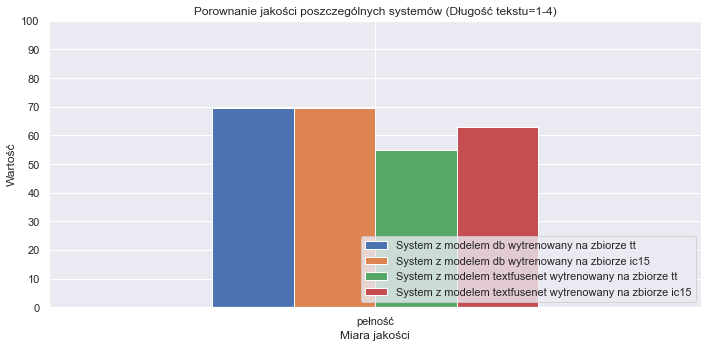

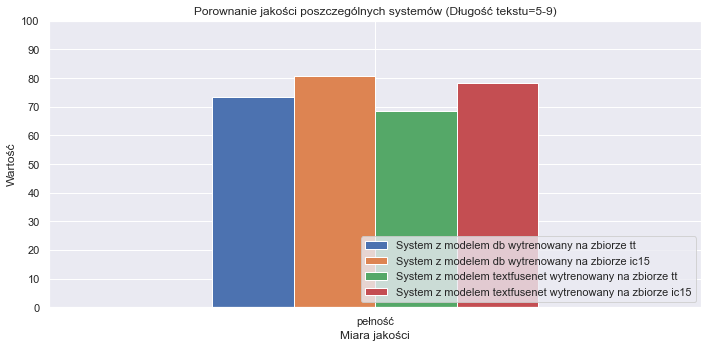

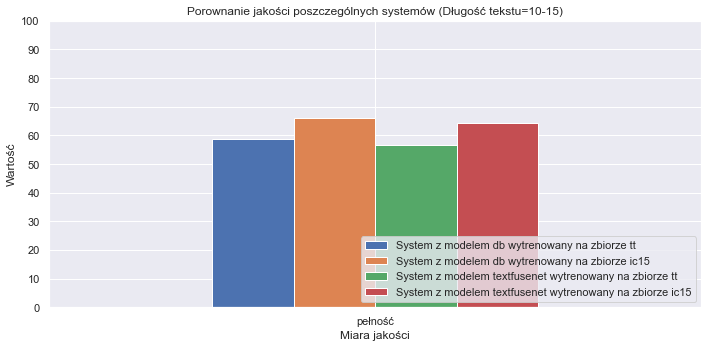

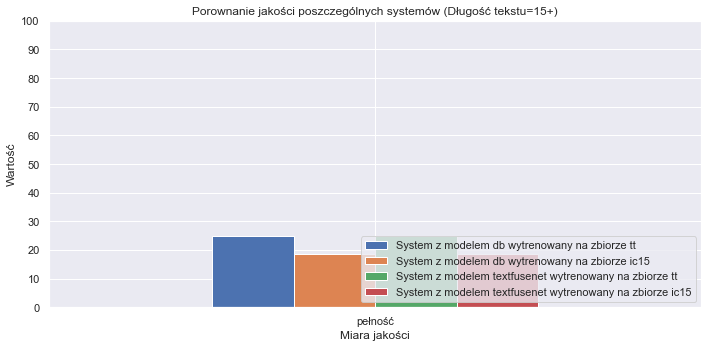

In [18]:
for key, value in detection_metrics.items():
    plot_detection_metrics(value, f"{path}/{key}_detection_metrics.png",
                          title = f"Porownanie jakości poszczególnych systemów ({kategoria}={key})")

## Plot metrics across split category

In [19]:
kategoria

'Długość tekstu'

In [20]:
import seaborn as sns

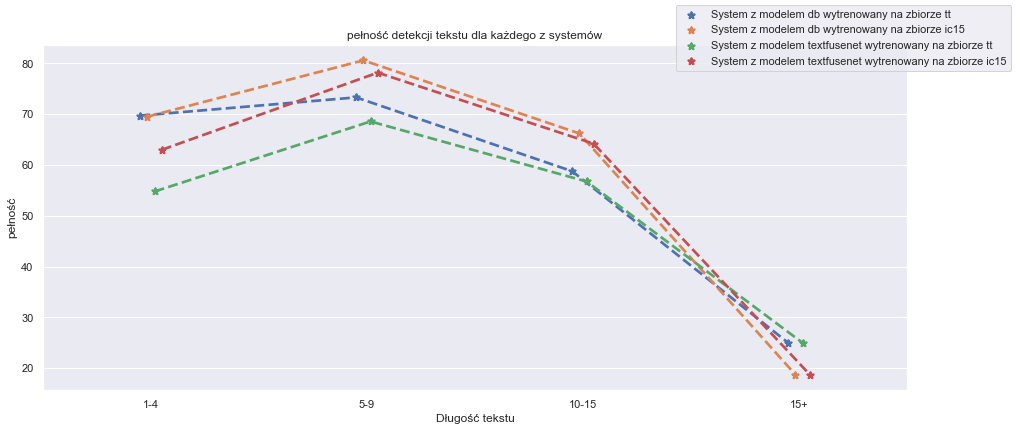

In [21]:
plot_detection_metrics_in_one(detection_metrics, filename=f"{path}/detections_metrics_subplot.jpg", category=kategoria,
                             figsize=(15,6))

### plot detections of each system on random image from totaltext dataset

In [22]:
results.dataset.unique()

array(['ic15', 'tt', 'ic03'], dtype=object)

1-4


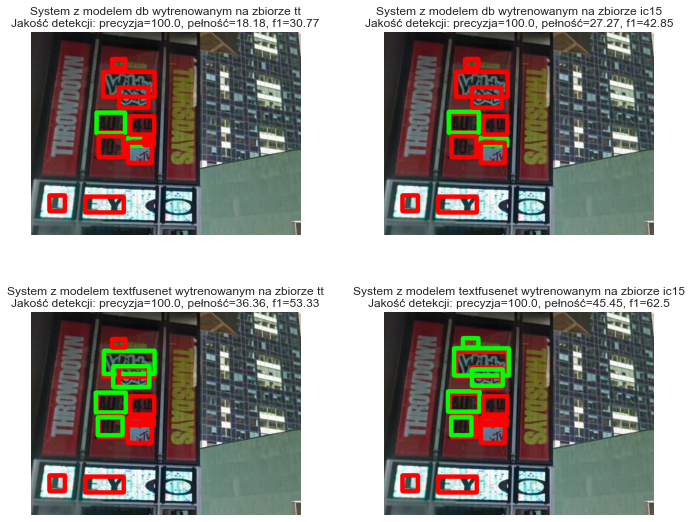

In [59]:
for category in categories:
    print(category)
    df = results[results[split_column] == category]
    plot_detections(df, models_list, weights_list, filename=f"{path}/{category}_detections.jpg",
                   linewidth=10)
    break

## Recognition results analysis

In [24]:
results[split_column].value_counts()

1-4      12813
5-9      11408
10-15      592
15+         64
Name: text_len, dtype: int64

In [26]:
recognition_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    recognition_metrics[category] = recognition_metrics_to_df(df, models_list, weights_list)

In [27]:
for key, value in recognition_metrics.items():
    print(key)
    
    display(value)

1-4


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,80.26,55.96
1,System z modelem db z wagami ic15,80.15,55.73
2,System z modelem textfusenet z wagami tt,81.25,44.52
3,System z modelem textfusenet z wagami ic15,79.44,50.05


5-9


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,78.62,57.64
1,System z modelem db z wagami ic15,76.12,61.36
2,System z modelem textfusenet z wagami tt,75.72,51.93
3,System z modelem textfusenet z wagami ic15,74.26,58.06


10-15


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,51.72,30.41
1,System z modelem db z wagami ic15,51.02,33.78
2,System z modelem textfusenet z wagami tt,41.67,23.65
3,System z modelem textfusenet z wagami ic15,42.11,27.03


15+


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,0.0,0.0
1,System z modelem db z wagami ic15,0.0,0.0
2,System z modelem textfusenet z wagami tt,0.0,0.0
3,System z modelem textfusenet z wagami ic15,0.0,0.0


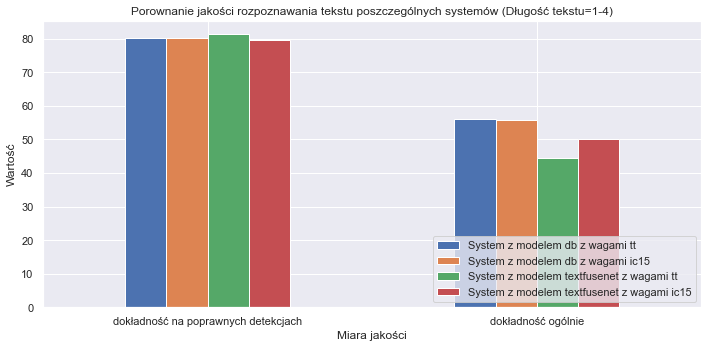

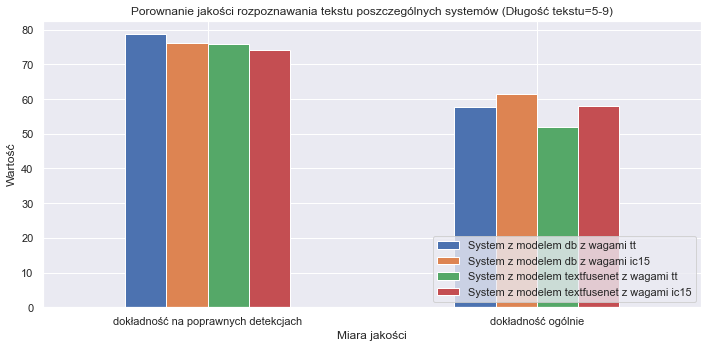

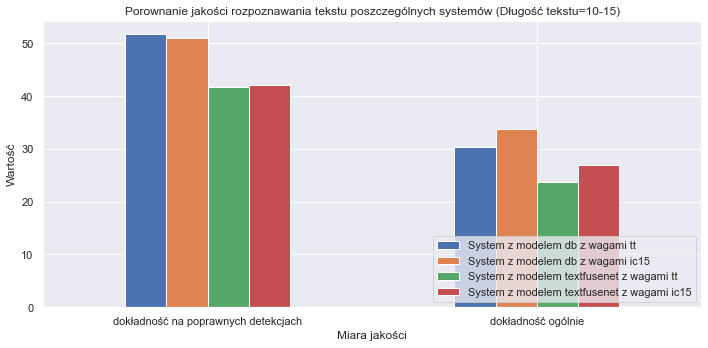

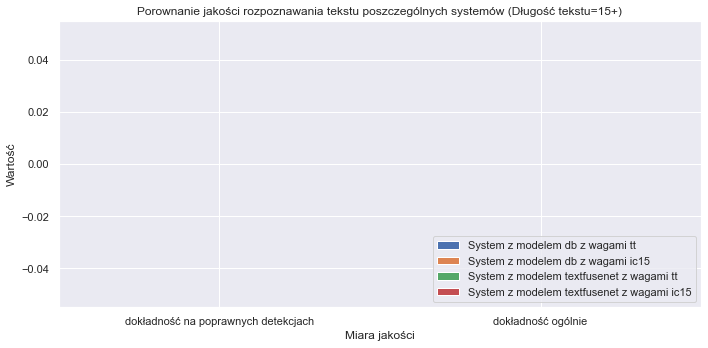

In [28]:
for key, value in recognition_metrics.items():
    print
    plot_recognition_metrics(value, f"{path}/{key}_recognition_metrics.png",
                          title = f"Porownanie jakości rozpoznawania tekstu poszczególnych systemów ({kategoria}={key})")

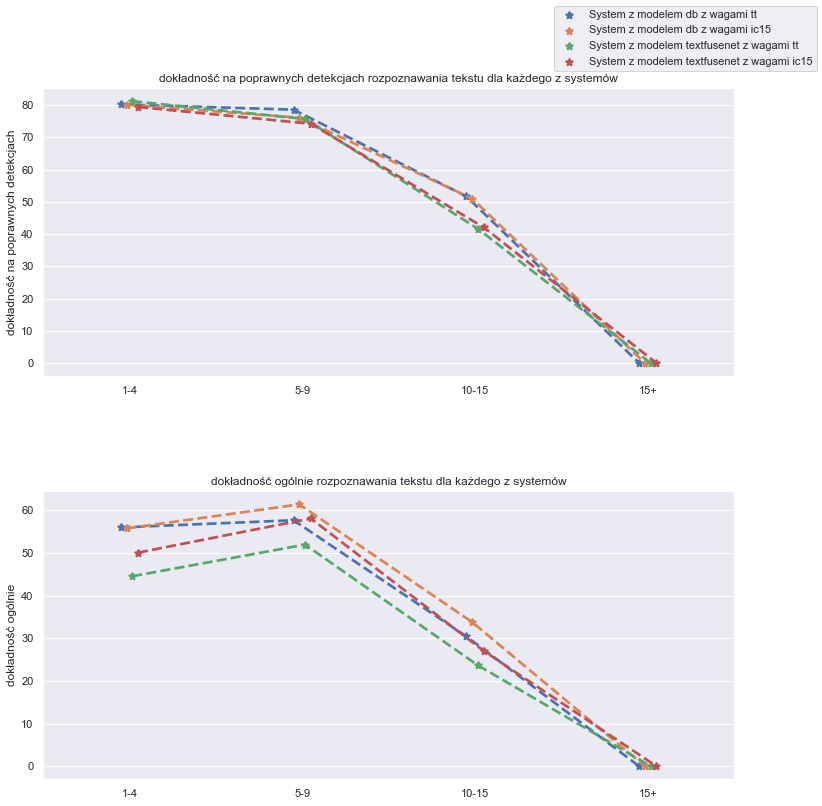

In [63]:
plot_recognition_metrics_in_one(recognition_metrics,
                              filename=f"{path}/recognitions_metrics_subplot.jpg",
                               figsize=(12, 12))

In [30]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_iou_histogram(df, models_list, weights_list, filename=f"{path}/{category}_iou_histograms.jpg")

1-4


ValueError: (15, 10) is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

### Recognition example

In [ ]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
#     print(df)
#     df = df[(df.detection_status=="TP")]
#     df = df[ (df.text_len.between(*split_conditions[category]))]
    plot_recognitions(df, models_list, weights_list, filename=f"{path}/{category}_recognitions.jpg")